# Active Learning Classifier experiment

In [1]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data,
                  columns=iris.feature_names,
                  )
df['Species'] = iris.target
target_names = {
    0 : 'setosa',
    1 : 'versicolor',
    2 : 'virginica'
}
df['Species'] = df['Species'].map(target_names)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [2]:
from datamanager import DataLoader

data_dict = {
    'target_feature' : 'Species',
    'used_features' : ['petal length (cm)','petal width (cm)']
}

data = DataLoader(df=df, **data_dict)

Loading DataFrame ...

Target feature: Species
Changing categorical values to classes.
Categories mapped to {'setosa': 0, 'versicolor': 1, 'virginica': 2}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   petal length (cm)  150 non-null    float64
 1   petal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB
Working DataFrame: None


In [3]:
test_split_size = .6

X_train, X_test, y_train, y_test = data.data_splits(test_size=test_split_size)

X_train.shape, X_test.shape

((60, 2), (90, 2))

In [4]:
from classification import *

# name as defined in the class
clf_model = 'GaussianProcessClassifier'

# specific parameters
clf_dict = dict(
    kernel=1.0 * RBF(1.0), 
    random_state=73
)

al_clf = ClassifierModel(model=clf_model, **clf_dict)

In [13]:
from acquisition import DecisionFunction

from learning import active_learning_cycle
from beauty import plot_active_learning_cycle, plot_classification

Cycle 0
Points used 2/60
Acquisition mode: exploration
Found 23 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.


Cycle 1
Points used 5/60
Acquisition mode: exploration


/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessClassifier was fitted with feature names
  warnings.warn(
/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessClassifier was fitted with feature names
  warnings.warn(




Cycle 2
Points used 8/60
Acquisition mode: exploration


Cycle 3
Points used 11/60
Acquisition mode: exploration


/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessClassifier was fitted with feature names
  warnings.warn(
/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessClassifier was fitted with feature names
  warnings.warn(




Cycle 4
Points used 14/60
Acquisition mode: exploration




/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessClassifier was fitted with feature names
  warnings.warn(
/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessClassifier was fitted with feature names
  warnings.warn(


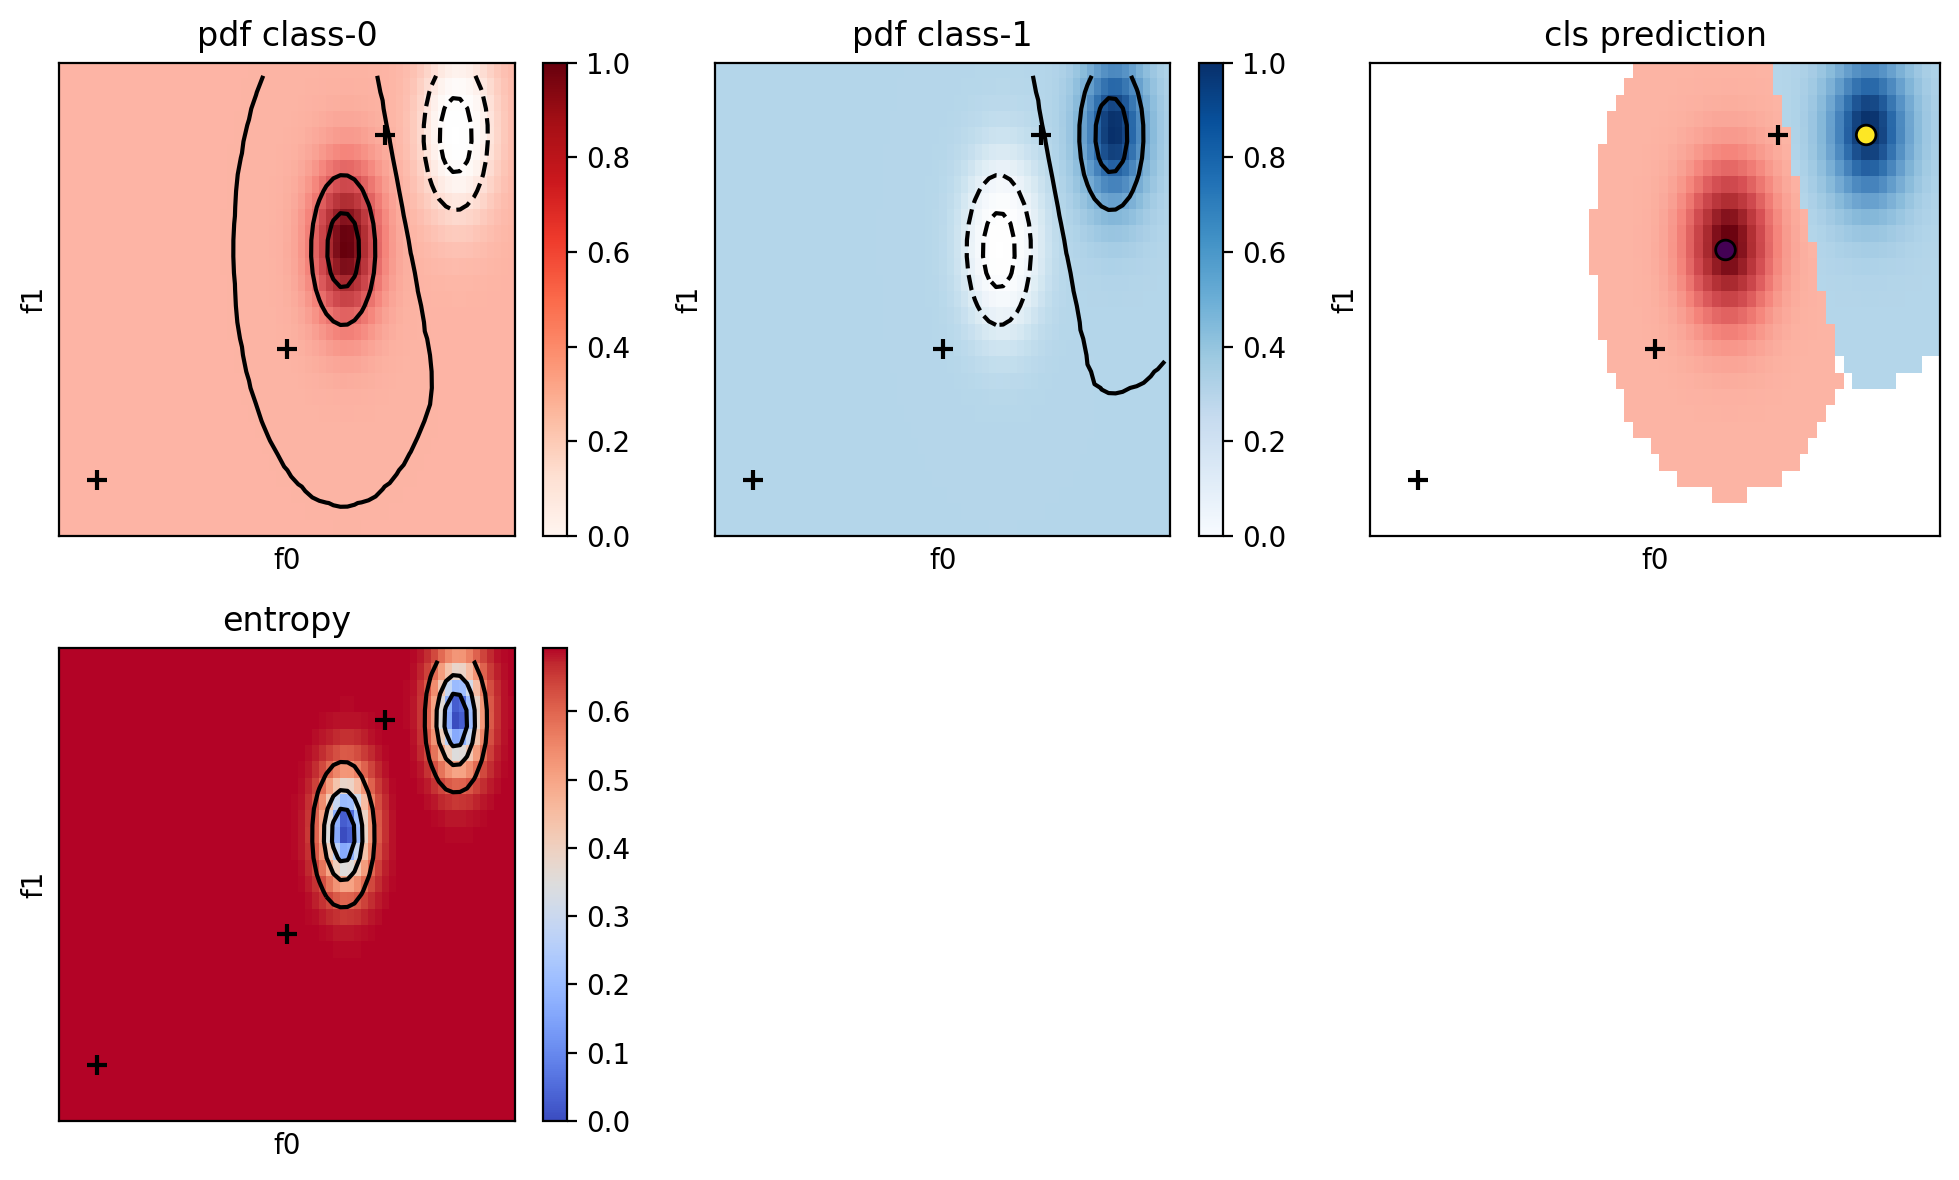

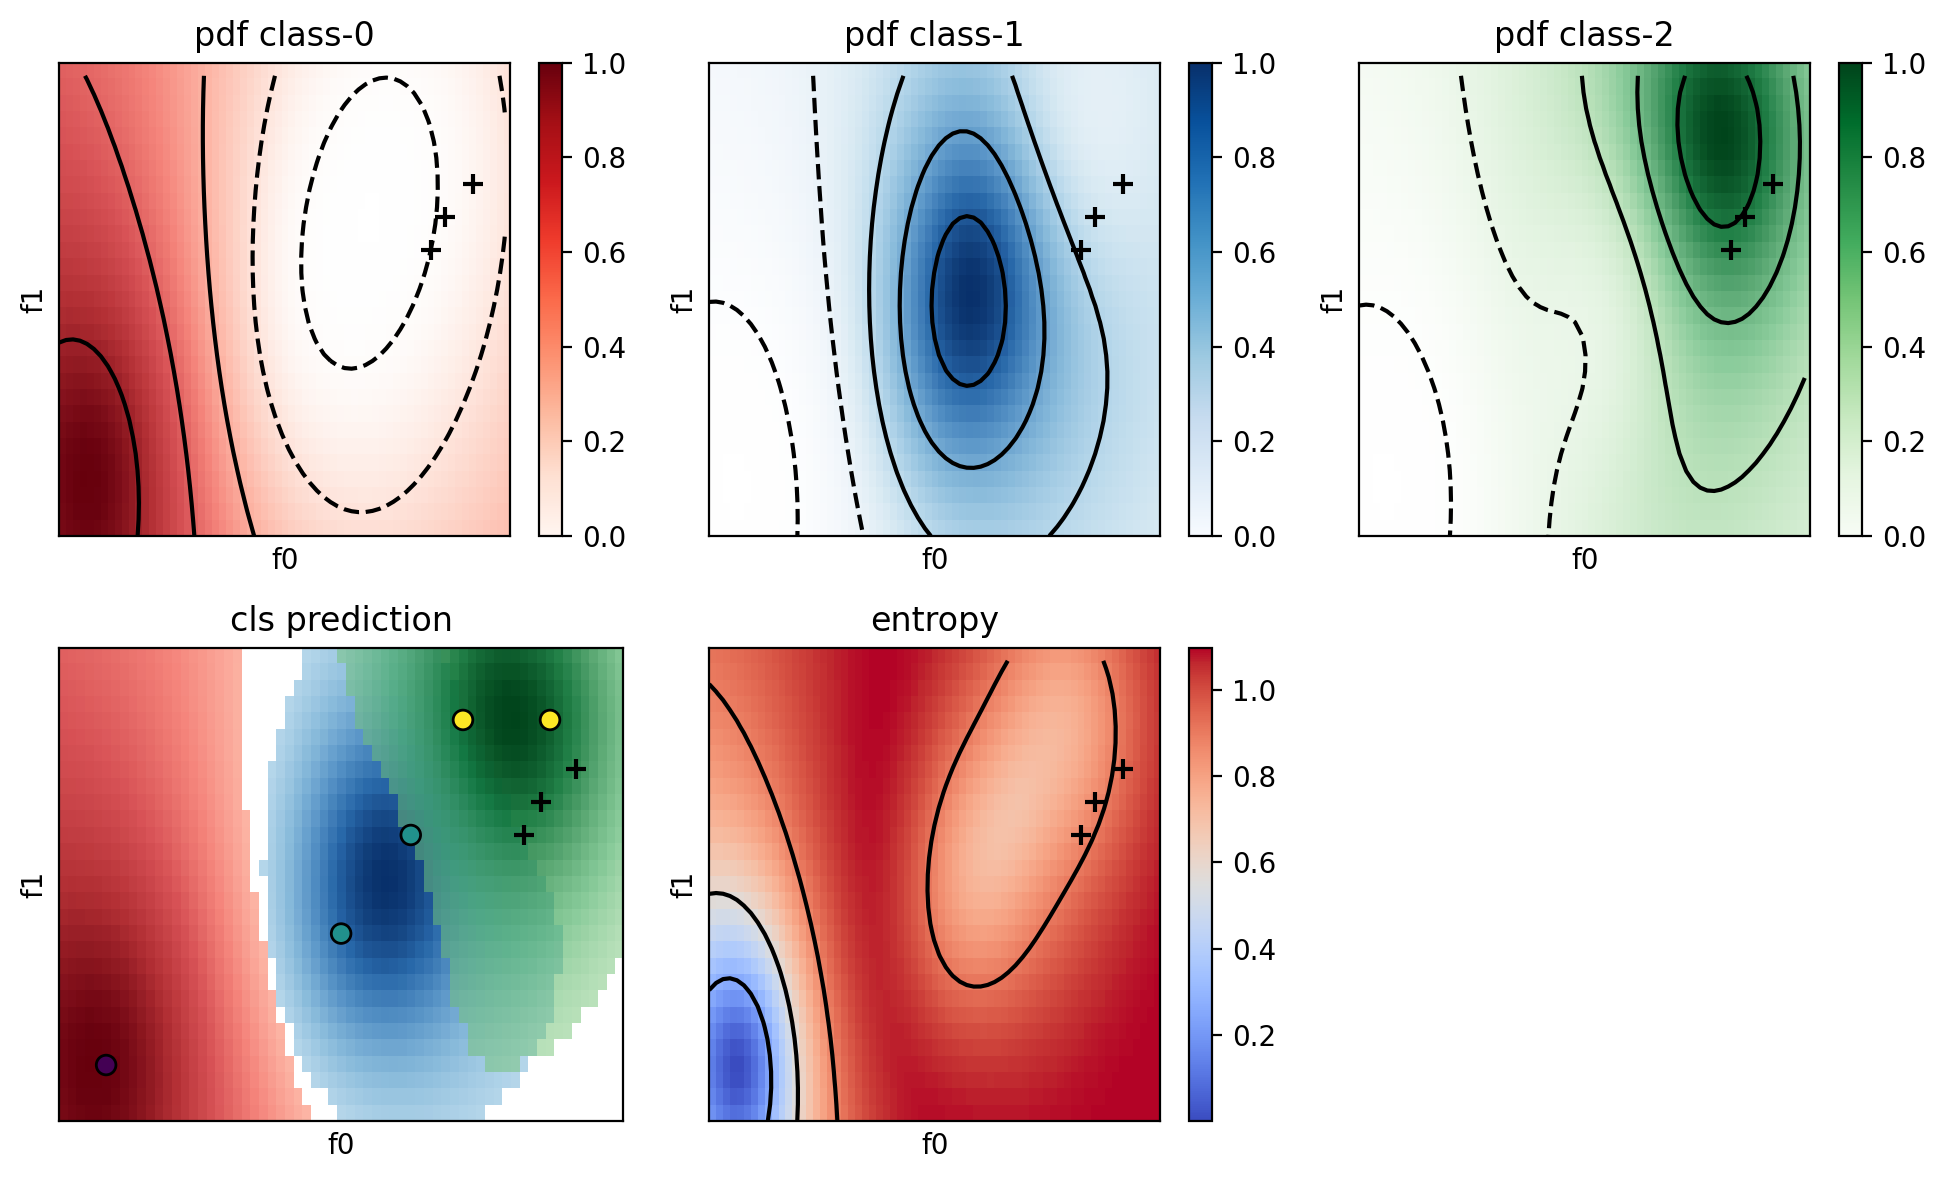

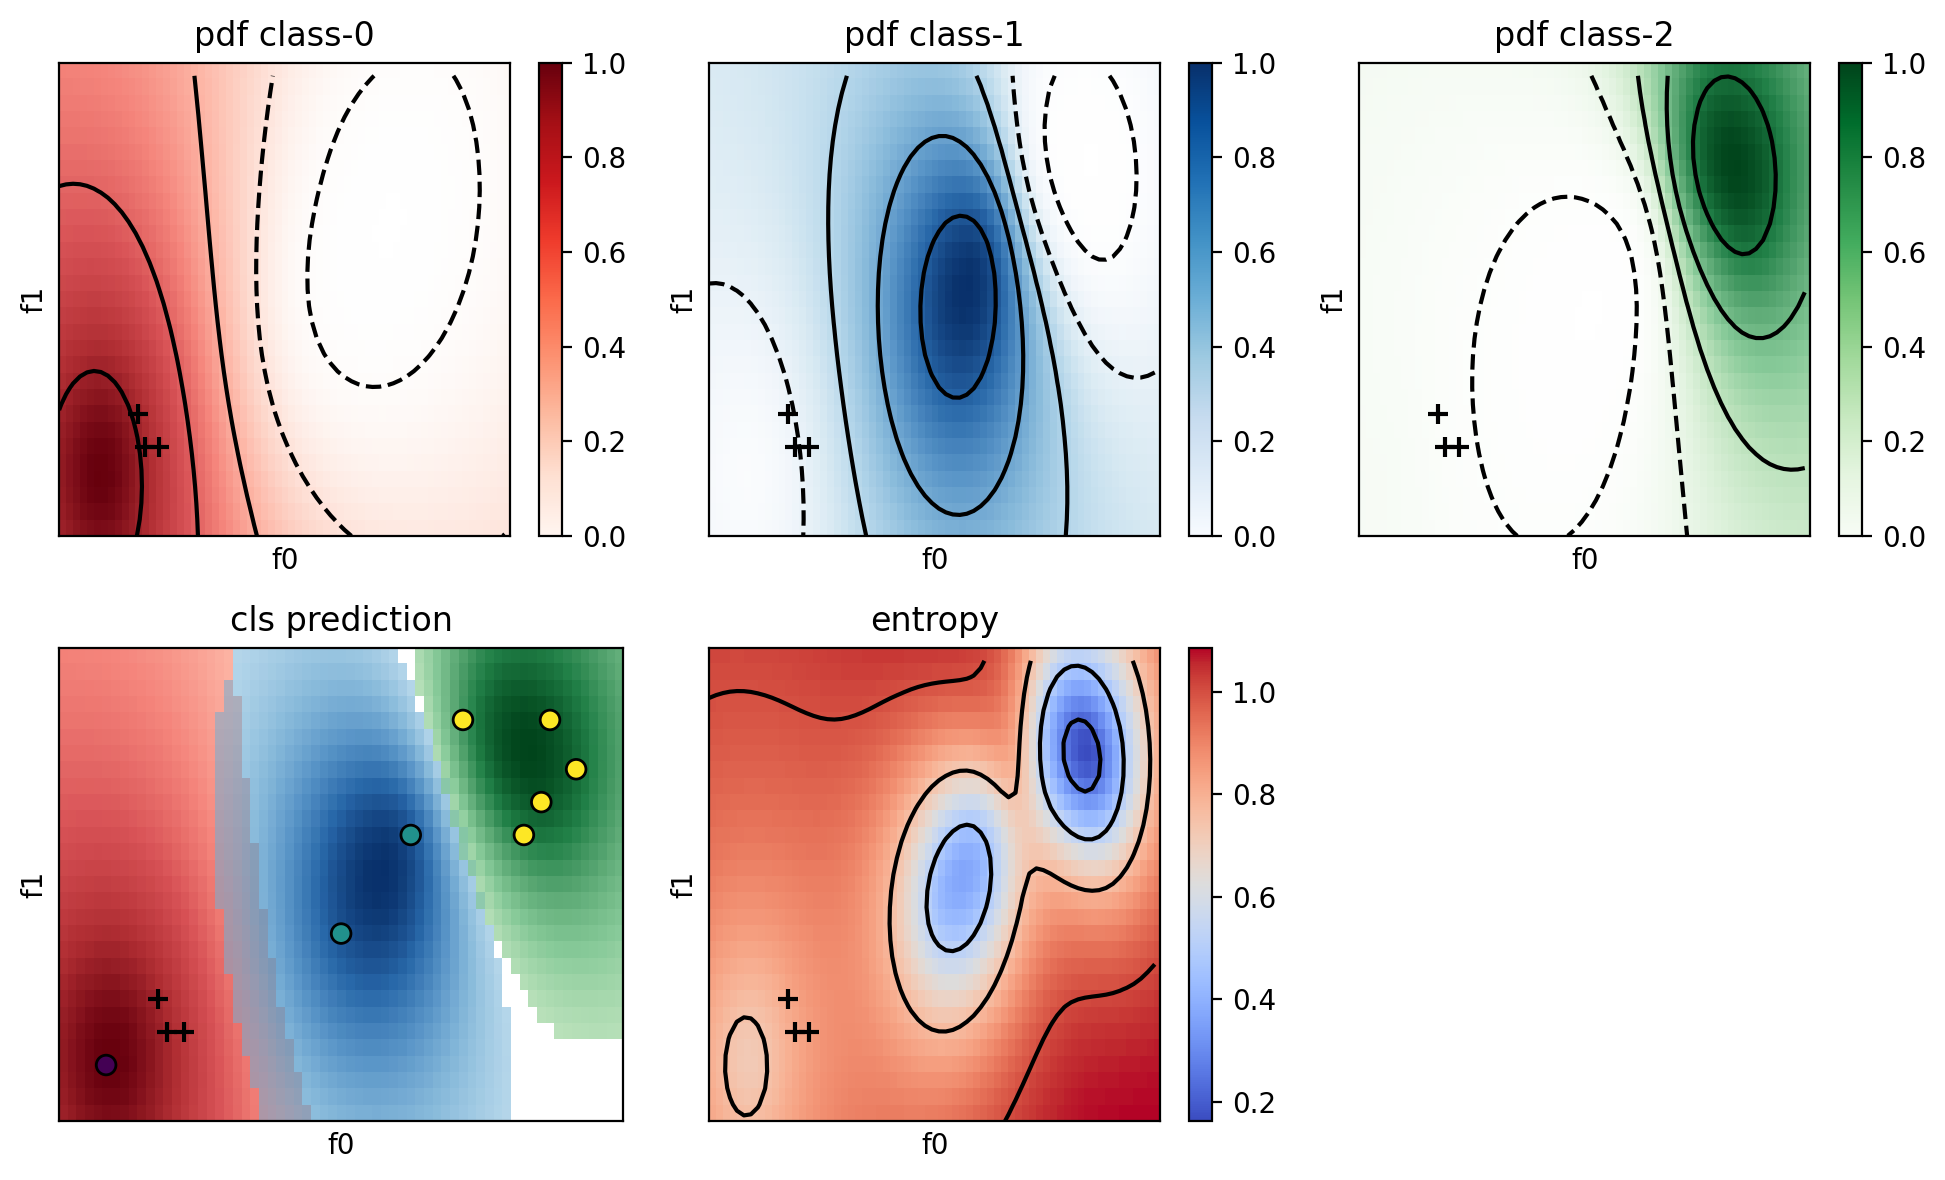

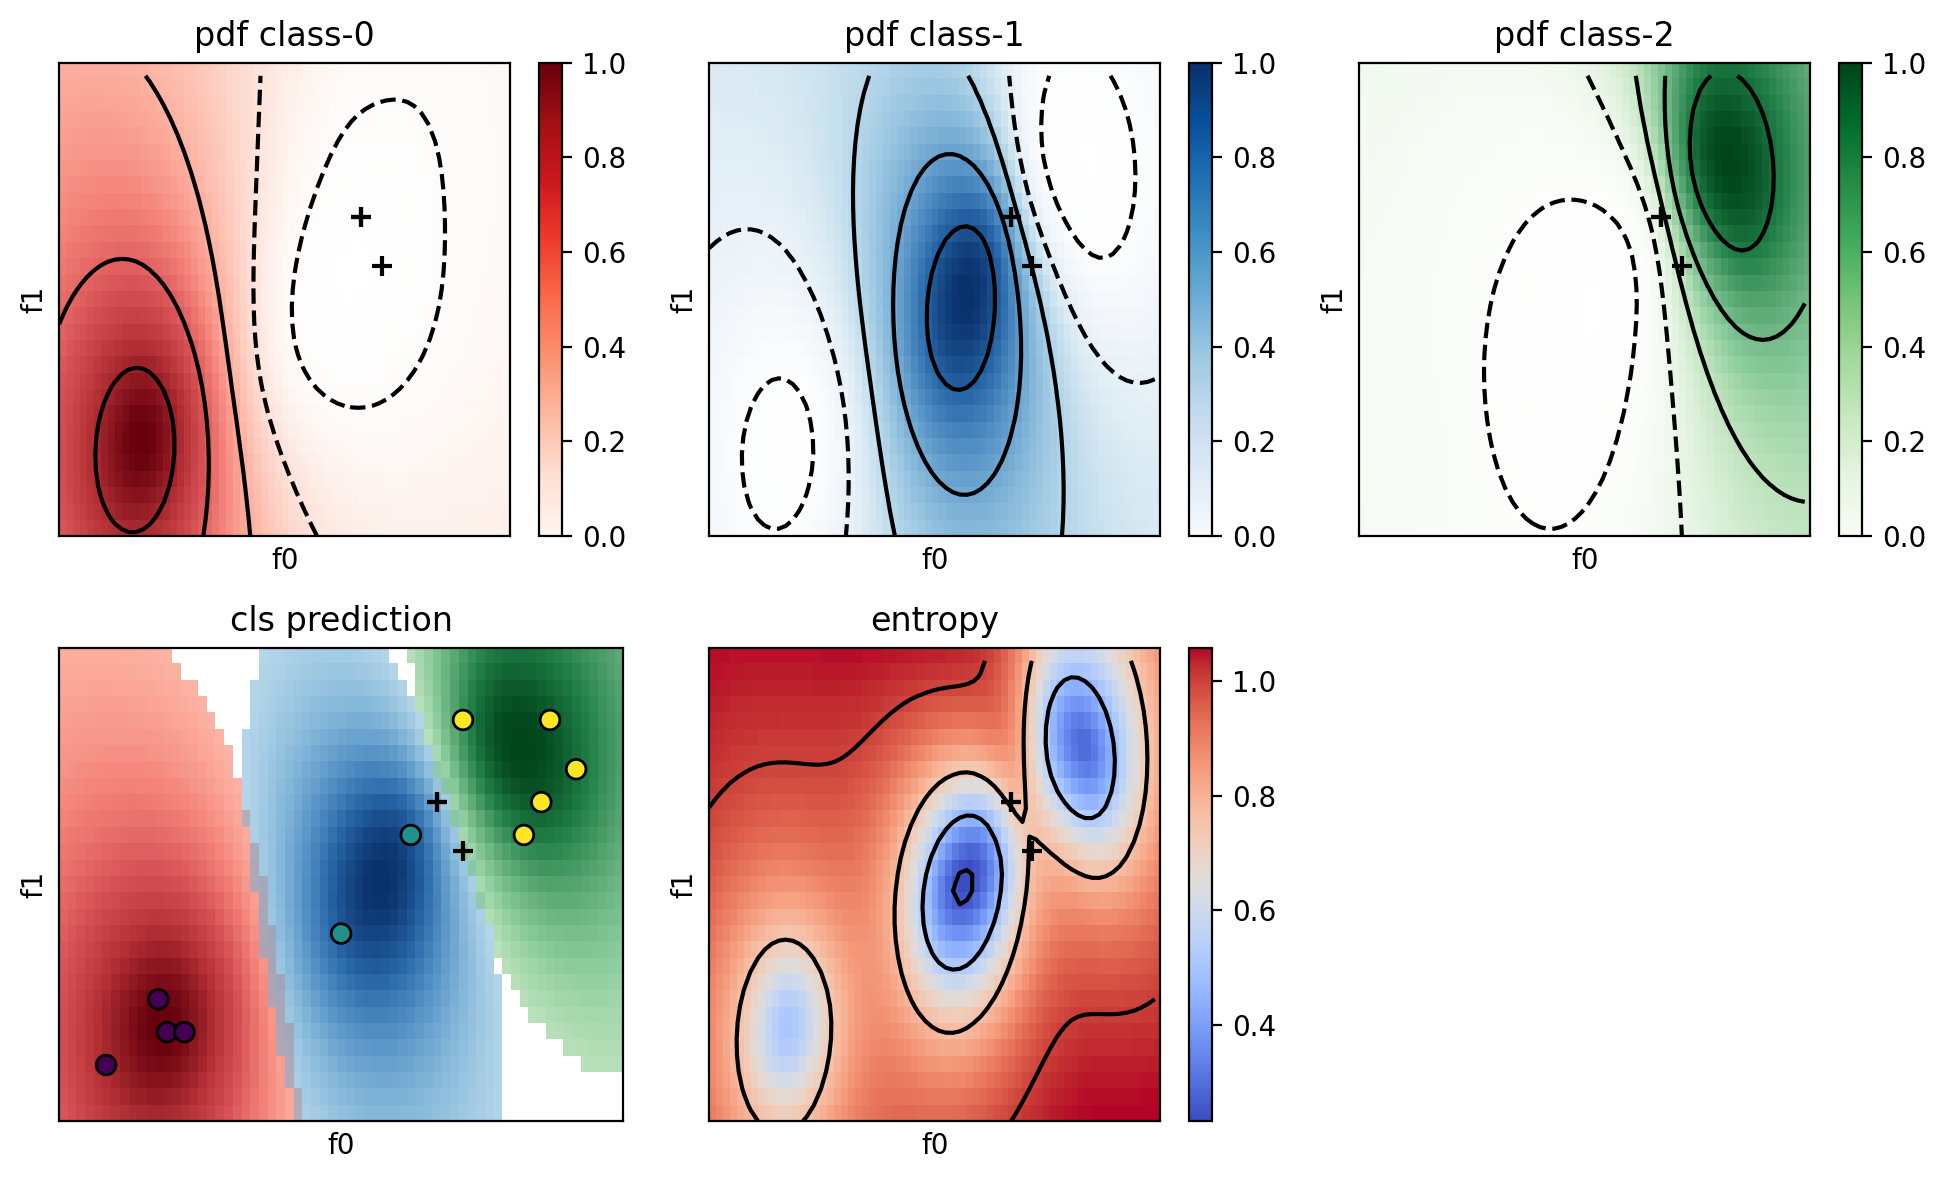

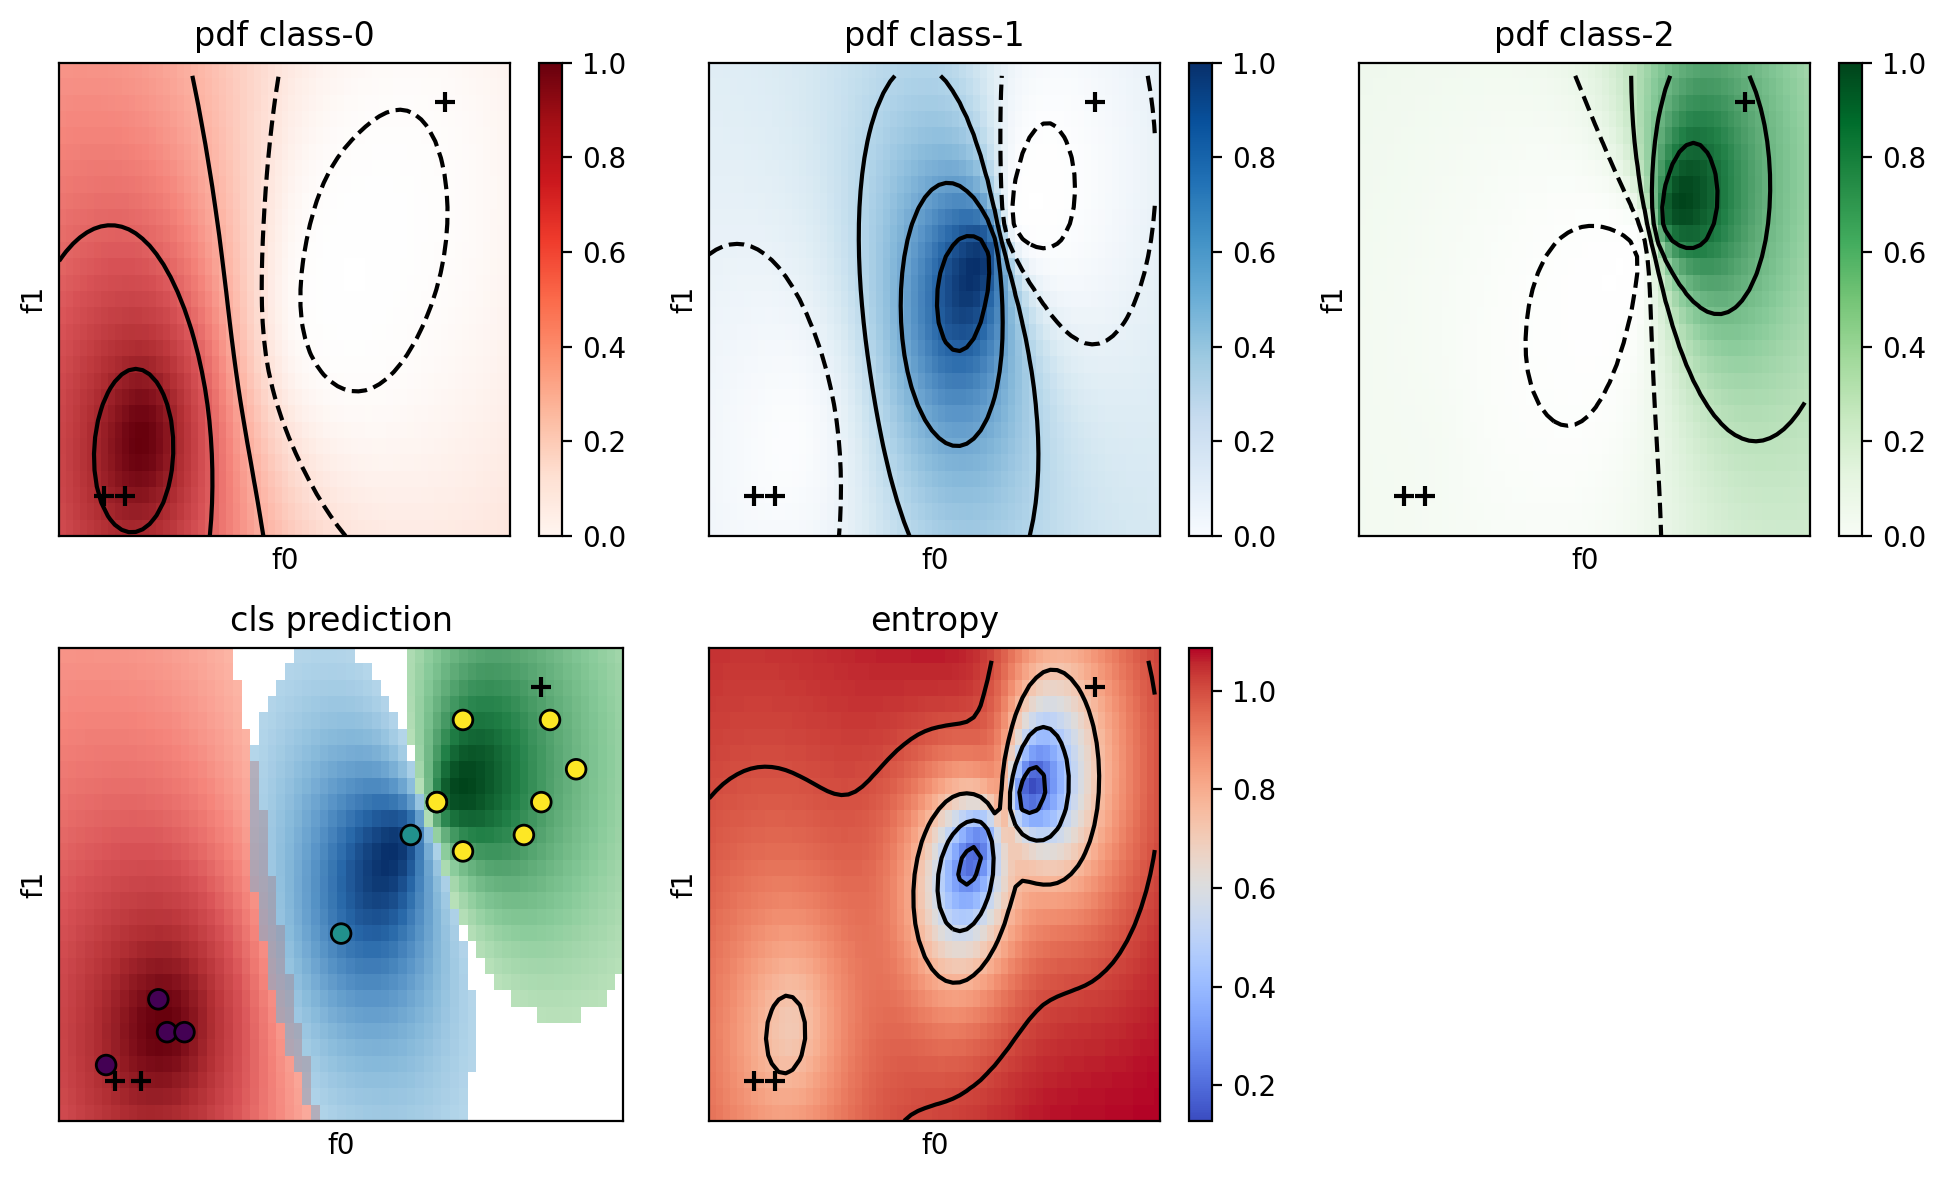

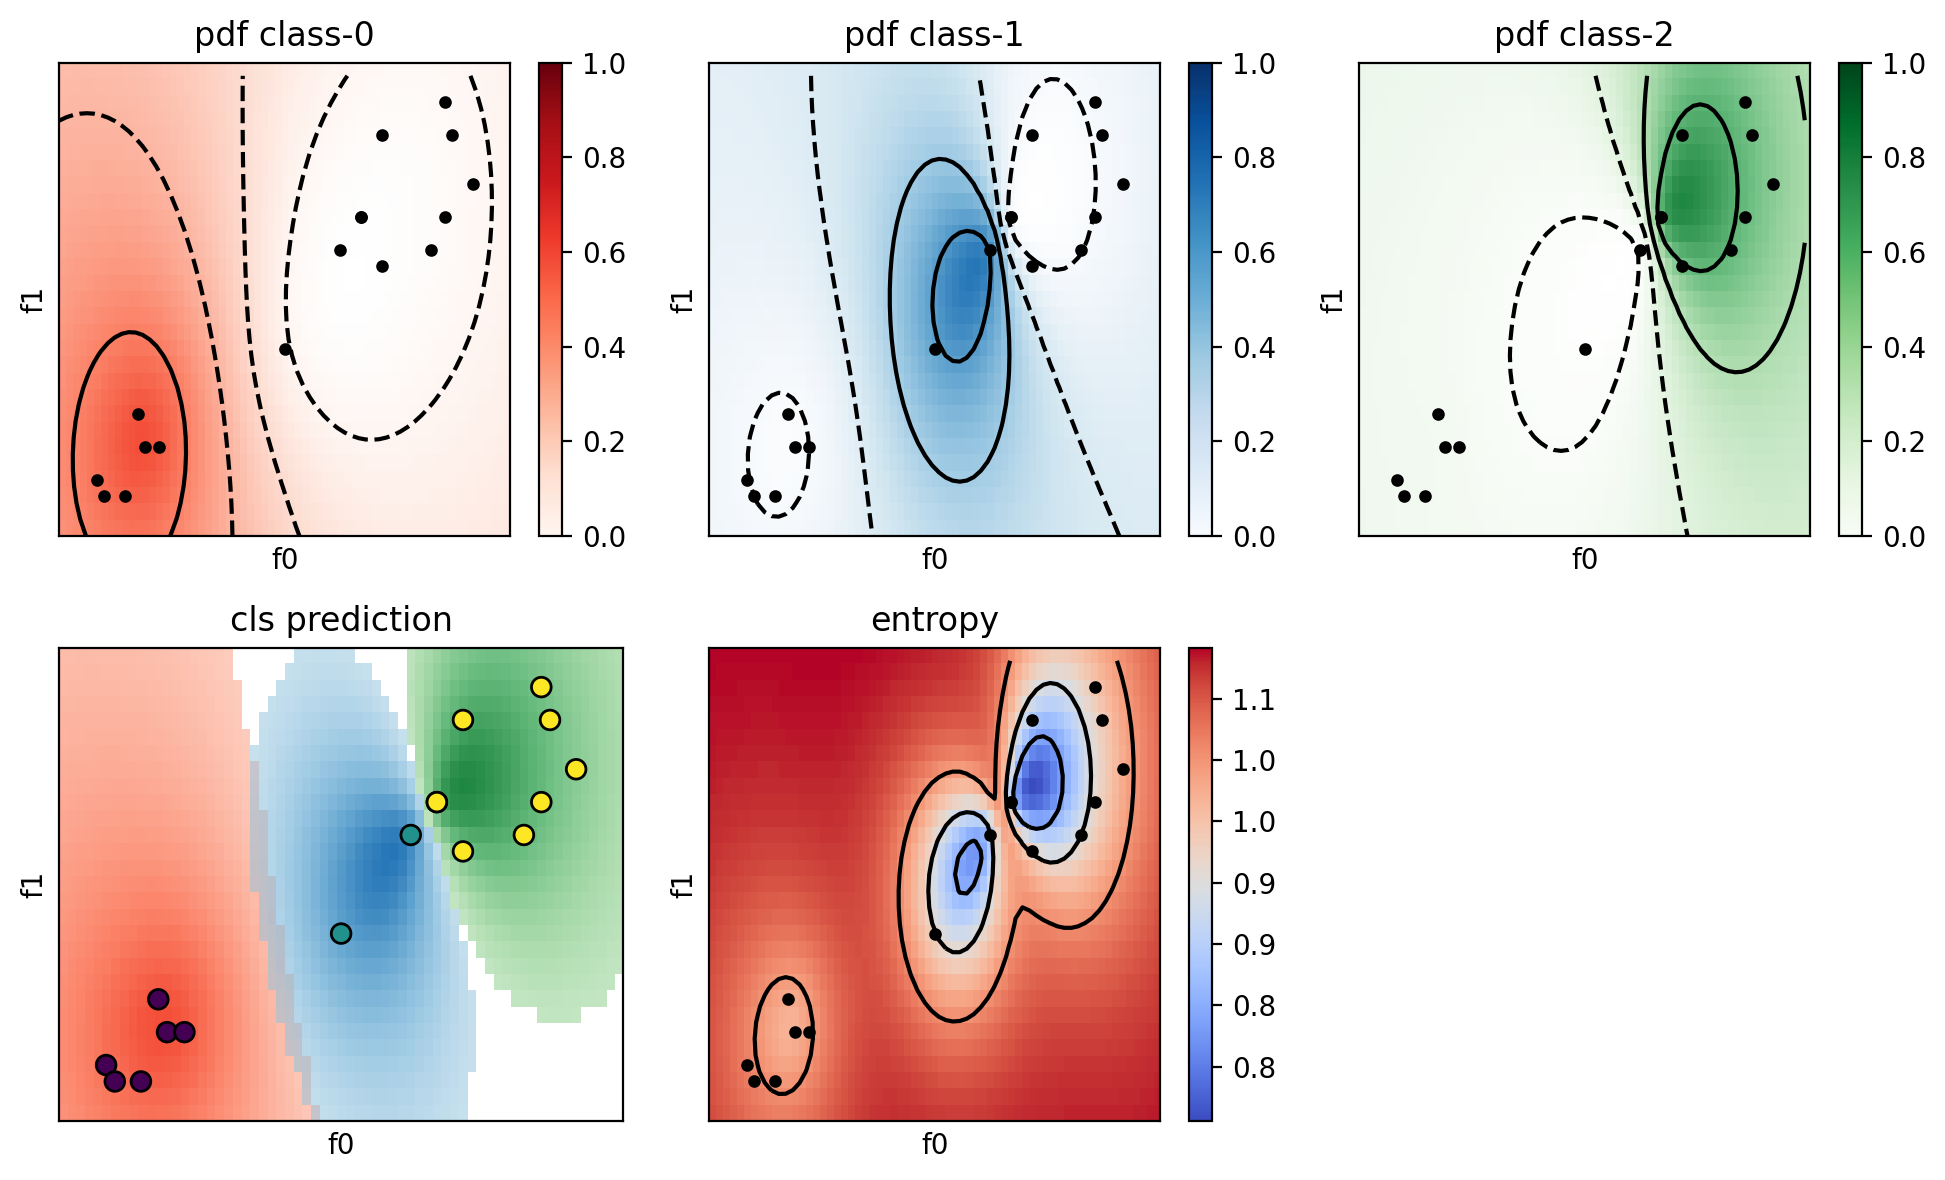

In [20]:
n_cycle = 5
n_batch = 3

idxs = [49,40]
f0, f1 = data_dict['used_features']
X0, X1 = X_train[f0], X_train[f1]

ac_func = DecisionFunction(mode='exploration')

for c in range(n_cycle):

    print(f'Cycle {c}')
    print(f'Points used {len(idxs)}/{len(X_train)}')
    print(f'Acquisition mode: {ac_func.mode}')

    if c == 0:
        sampling_mode = 'FPS'
    else :
        sampling_mode = 'random'

    # if c > 3:
    #     ac_func = DecisionFunction(mode='exploitation')

    new_idxs = active_learning_cycle(
        feature_space=(X_train, y_train),   # starting training feature space (points, classes)
        idxs=idxs,                          # starting indexes
        new_batch=n_batch,                  # number of points in outcome
        clfModel=al_clf,                    # initialised classifier
        acquisitionFunc=ac_func,            # aquisition mode
        screeningSelection=sampling_mode    # sampling methods for the points acquisition
        )
    
    plot_active_learning_cycle(
        feature_space=(X0,X1,y_train),  # feature space (only for visualisation)
        clfModel=al_clf,                # fit classifier
        idxs=idxs,                      # start indexes
        new_idxs=new_idxs               # output indexes from the AL-clf cycle
        )
    
    idxs = idxs + new_idxs
    print('\n')

plot_classification(feature_space=(X0.iloc[idxs], X1.iloc[idxs], y_train.iloc[idxs]), clfModel=al_clf)

In [21]:
al_clf.clf.score(X_test, y_test)

0.9444444444444444